# Single Quantum kicked top

$H=\alpha J_y +\frac{k}{2J+1}J_z^2\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

Where $\large{\alpha = \frac{\hslash p}{\tau}}$ from Haake paper on Kicked top. Link: [Classical and quantum chaos for a kicked top by Haake](https://link.springer.com/article/10.1007/BF01303727)

$U_\alpha(k) = exp(-i\frac{k}{2J+1}J_z^2)\cdot exp(-i\alpha J_y)$

## Classical map of kicked top

$\hbar$ and $\tau$ is 1.

In [7]:
# using libraries for classical map
import PyPlot as plt
using Plots

In [4]:
# parameters
p = 1.73
k = 2.0
#---------------------------------

# defining the maping function(classical map of quantum kicked top)
function F(x,y,z)
    z1 = z * cos(p) - x * sin(p)
    x1 = (x*cos(p) + z*sin(p)) * cos(k * z1) - y * sin(k * z1)
    y1 = (x*cos(p) + z*sin(p)) * sin(k * z1) + y * cos(k * z1)
    
    return x1,y1,z1
end
#---------------------------------

F (generic function with 1 method)

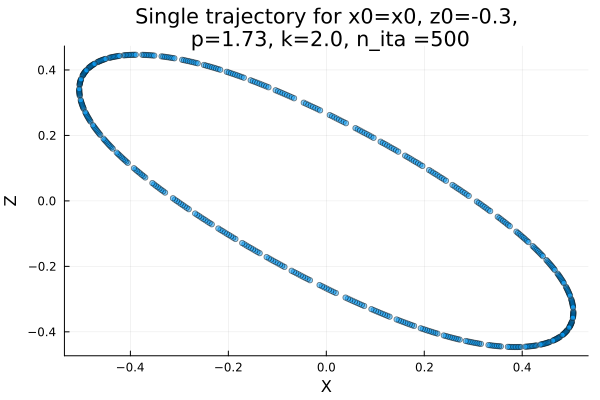

In [5]:
# ploting of single trajectories for given initial point.

# plotting parameter/parameters
n_ita = 500 # number of iteration.
# initial points
x0 = 0.5
z0 = -0.3
y0 = sqrt(1-round(x0^2+z0^2,digits = 15));
#---------------------------------


# data storing space of x, y and z for 'n_ita' iteration.
x = zeros(1,n_ita)
y = zeros(1,n_ita)
z = zeros(1,n_ita)

# storing initial points
x[1,1] = x0
y[1,1] = y0
z[1,1] = z0

# iterations
for i = 2:n_ita
    xi, yi, zi = F(x[1,i-1],y[1,i-1],z[1,i-1])# mapping x,y,z

    #storing the data of new x,y,z
    x[1,i] = xi
    y[1,i] = yi
    z[1,i] = zi
end

# Plot of trajectories for given initial conditions.
plot1 = scatter(x',z',ms=3, ma=0.5,xlabel = "X",ylabel = "Z")
plot(plot1, legend = false, title = "Single trajectory for x0=x0, z0=$z0,\n p=$(round(p,digits = 3)), k=$k, n_ita =$n_ita")

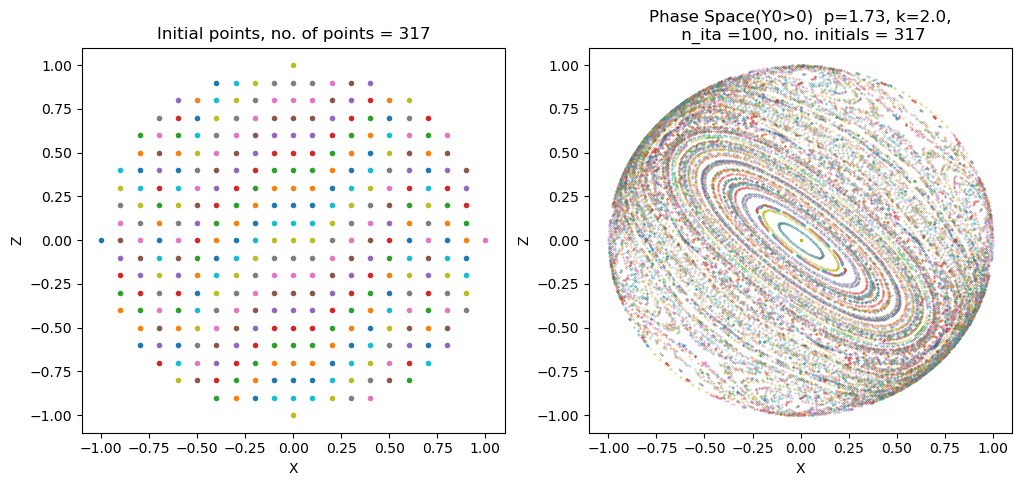

2-element Vector{PyCall.PyObject}:
 PyObject Text(0.5, 24.0, 'X')
 PyObject Text(531.2727272727273, 0.5, 'Z')

In [6]:
# phase space plot

# plotting parameter/parameters
n_ita = 100 # number of iteration.
num_points = 21
#---------------------------------


# data storing space of x, y and z for 'n_ita' iteration.
x = zeros(1,n_ita)
y = zeros(1,n_ita)
z = zeros(1,n_ita)

# initial points
x0_data = range(start = -1, stop = 1, length = num_points)
z0_data = range(start = -1, stop = 1, length = num_points)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5));
cont_no_points = 0

# iteration
for x0_i ∈ x0_data
    for z0_i ∈ z0_data
        if round(x0_i^2 + z0_i^2,digits = 14) ≤ 1
            cont_no_points = cont_no_points +1
            x0 = x0_i
            z0 = z0_i
            y0 = sqrt(1-round(x0^2+z0^2,digits = 15));
            x[1,1] = x0
            y[1,1] = y0
            z[1,1] = z0
            
            for i = 2:n_ita
                xi, yi, zi = F(x[1,i-1],y[1,i-1],z[1,i-1])# mapping x,y,z

                #storing the data of new x,y,z
                x[1,i] = round(xi, digits = 7)
                y[1,i] = round(yi, digits = 7)
                z[1,i] = round(zi, digits = 7)

                if xi^2 + yi^2 + zi^2 >1.001
                    println("At i= $i x or y or z in negative.",xi^2 + yi^2 + zi^2 );
                end
            end
            #ploting the data
            ax1.plot(x0,z0,".")
            ax2.plot(x',z',".",markersize = 0.5) 
        end
        
    end
end

# plot title, lebels etc.
ax1.set_title("Initial points, no. of points = $cont_no_points")
ax1.set(xlabel= "X", ylabel = "Z")
ax2.set_title("Phase Space(Y0>0)  p=$(round(p,digits = 3)), k=$k,\n n_ita =$n_ita, no. initials = $cont_no_points")
ax2.set(xlabel= "X", ylabel = "Z")
#plt.savefig("Phase Space k4.png")

## OTOC and level spacing for single kicked top

$OTOC_{max} = \frac{1}{d}Tr(|[A_t,B]|^2)$. Max means with respect to maximally mixed state.

$OTOC_{\rho} = Tr(\rho*|[A_t,B]|^2)$

Here floquet $U$ comute with $Ry = e^{-iπJy}$. So in this basis U is block diagonal. In the same basis $Jy$ 
will atleast be block diagonal. $Jy$ can be again reduce in that subspace and it is possible to make it 
    diagonal. But let's take the block diagonal form. Use $A = Jy$, $B = Jy$ to calculate OTOC, because of subsspace division we can go much higher dimensin. Consider $Λ'*Jy*Λ$, make $Jy$ as block diagonal matrix. We can use $e^{-i\theta J_y}$ for some value of $\theta$.
    
The floquet has parity symmetry($Ry = e^{-iπJy}$). Therefore to get level statistics we need to go any one of the subspace among the two subspace. Two subspaces are independent so it can not be mixed.

In [13]:
# using libraries
using QuantumOptics
using SparseArrays
using LinearAlgebra
using Statistics
using FastExpm
import QuantumInformation as qinfo
import PyPlot as plt
using Plots

In [9]:
#------------------------------------------------
# Parameters
k1 = 6.0;
j1 = 400
p = 1.43
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
N1 = convert(Int64,2*j1+1) # N1 is the dimension of the 1st hilbert space (2j1 +1).
#------------------------------------------------

# Basis
b1 = SpinBasis(j1)

# Operator creation
Jy1 = 0.5*sparse(sigmay(b1).data)
Jz1 = 0.5*sparse(sigmaz(b1).data)

# Floquet operators
# U1 for j=j1
U = fastExpm(-1im*k1*Jz1*Jz1/(2*j1), threshold=1e-15,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy1,threshold=1e-15,nonzero_tol = ϵ);

### OTOC (out-of-time-order-correlation)

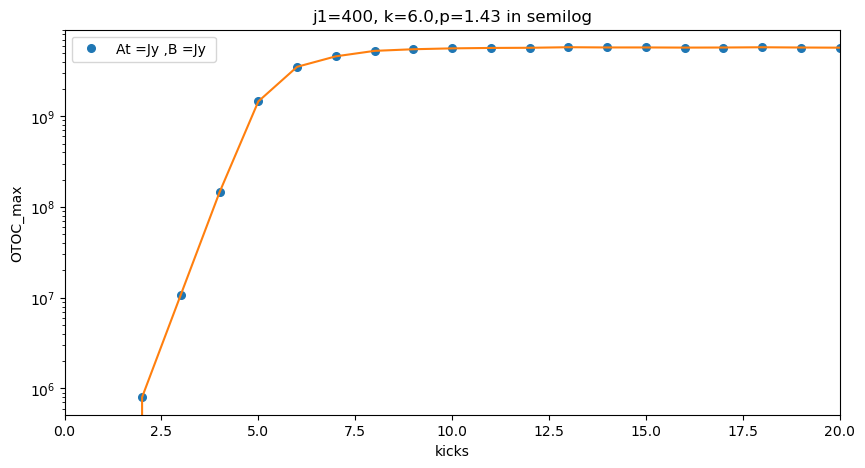

(0.0, 20.0)

In [10]:
### OTOC with time

#------------------------------------------------
kicks = 20 # number of δ kicks.
#------------------------------------------------

time_array = zeros(1,kicks)

OTOC_max = zeros(1,kicks)
At = Jy1
B = Jy1
for i = 1:kicks
    time_array[1,i] = i
    commutator = At * B - B * At
    OTOC_max[1,i] = (1/N1)*tr(commutator' * commutator)
    At = U * At * U'
end
#------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(time_array',OTOC_max',"o",markersize=5.5, label = "At =Jy ,B =Jy ")
plt.plot(time_array',OTOC_max',"-",markersize=5.5)
plt.xlabel("kicks")
plt.yscale("log")
plt.title("j1=$j1, k=$k1,p=$p in semilog")
plt.ylabel("OTOC_max")
plt.legend()
plt.xlim(0,20)
#plt.savefig("plots/OTOC j1j2=$j1 k1k2=$k1.png")

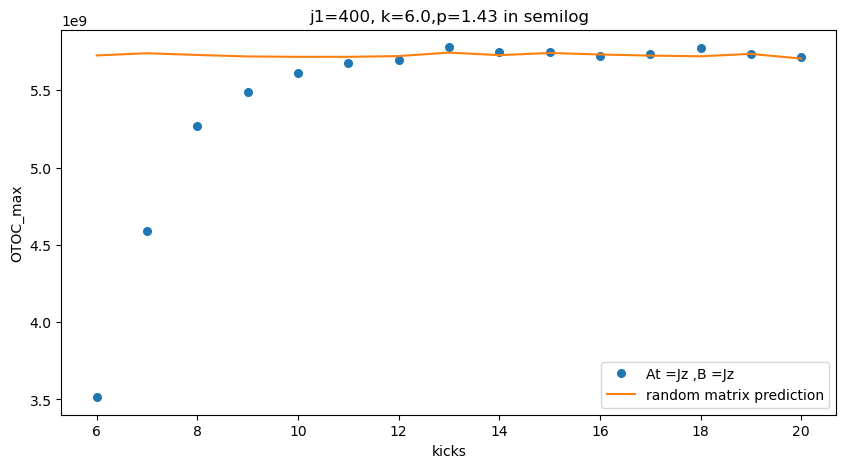

PyObject <matplotlib.legend.Legend object at 0x7f16f2c75700>

In [18]:
# Saturation value using random matrix prediction.

# ploting parameter
start_kick_no = 6;
end_kick_no = kicks;
#------------------------------------------------


time_array = zeros(1,kicks)
β = 1 # β = 1 for COE matrix, 2 for CUE.
U_rand = qinfo.rand(qinfo.CircularEnsemble{β}(N1));

OTOC_rand = zeros(1,kicks)
At = Jz1
B = Jz1
U_rand = 
for i = 1:kicks
    time_array[1,i] = i
    commutator = At * B - B * At
    OTOC_rand[1,i] = (1/N1)*tr(commutator' * commutator)
    At = U_rand * At * U_rand'
end
#------------------------------------------------

plt.figure(figsize=(10,5))
plt.plot(time_array[start_kick_no:end_kick_no]',OTOC_max[start_kick_no:end_kick_no]',"o",markersize=5.5, label = "At =Jz ,B =Jz ")
plt.plot(time_array[start_kick_no:end_kick_no]',OTOC_rand[start_kick_no:end_kick_no]',"-",markersize=5.5, label = "random matrix prediction")
plt.xlabel("kicks")
#plt.yscale("log")
plt.title("j1=$j1, k=$k1,p=$p in semilog")
plt.ylabel("OTOC_max")
plt.legend()
#plt.xlim(0,20)

### Level spacing for single kicked top

  0.182783 seconds (13 allocations: 2.678 MiB)
  0.000031 seconds (4 allocations: 6.656 KiB)


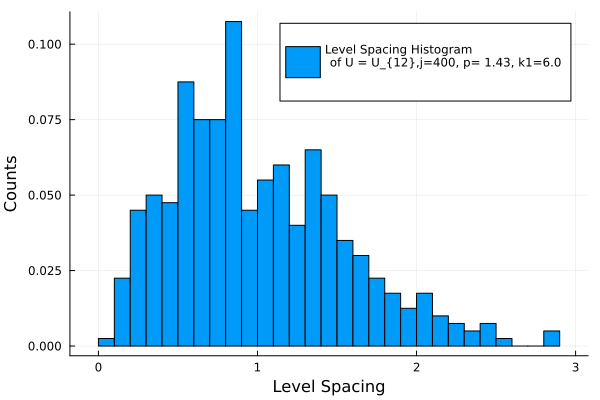

In [19]:
# Dividing two suspace (evan-odd)

#------------------------------------------------
Λ1 = Matrix{Float64}(I, N1, N1) # N×N identity matrix.
for i = 1:2:j1
    Λ1[:,i],Λ1[:,N1-i+1] = normalize(Λ1[:,i] + Λ1[:,N1-i+1]),normalize(Λ1[:,i] - Λ1[:,N1-i+1])
    Λ1[:,i+1],Λ1[:,N1-i] = normalize(Λ1[:,i+1] - Λ1[:,N1-i]),normalize(Λ1[:,i+1] + Λ1[:,N1-i])
end

# to get the even-odd block in 1st Hilbert space.
# even block mesns Block of U1 in the space Ry has +1 eigenvaue.
if iseven(j1)
    Λ1_even = Λ1[:,1:(j1+1)]
    Λ1_odd = Λ1[:,(j1+2):N1]
elseif isodd(j1)
    Λ1_even = Λ1[:,1:j1]
    Λ1_odd = Λ1[:,(j1+1):N1]
else
    println("j1 = $j1, there is a problem in the value of j1")
end

Λ1_even = sparse(Λ1_even)
Λ1_odd = sparse(Λ1_odd)

Λ_even = Λ1_even

# Now, Λ_even is a transformation matrix which give even only subspace.
U_eblok = Λ_even' * U * Λ_even # even block of floquet matrix U1.
#------------------------------------------------


#------------------------------------------------
# calculating level spacing in the subspace(even or odd).

@time begin
#------------------------------------------------------
# finding the eigendecomposition of U1 in even subspace
eigv_U = eigvals(U_eblok);# eigenvalues of U1, in even parity subspace.
#------------------------------------------------------
end

@time begin
eigv_angles_U = angle.(eigv_U)# find angels in of the eigenvalues that got from last step.
sorted_eigv_angles_U = sort(eigv_angles_U)# sort the angles in ascending order.
end

# calculate the level spacing by taking the difference between adjacent angles.
spacings_U = 1diff(sorted_eigv_angles_U);
spacings_U = (1/mean(spacings_U))*spacings_U; # normalizing the level spacing.

# Plot a histogram of the level spacing.
histogram(spacings_U,bins=50,xlabel="Level Spacing",normalize=:probability,ylabel="Counts",label="Level Spacing Histogram\n of U = U_{12},j=$j1, p= $(round(p,digits = 3)), k1=$k1 \n ")
